In [1]:
from ltlcross_runner import LtlcrossRunner
from IPython.display import display
import pandas as pd
import spot
import sys
spot.setup(show_default='.a')
pd.options.display.float_format = '{: .0f}'.format
pd.options.display.latex.multicolumn_format = 'c'

$\newcommand{\F}{\mathsf{F}}$
$\newcommand{\G}{\mathsf{G}}$
$\newcommand{\FG}{\mathsf{F,G}}$
## Formulae
We evaluate our translation on randomly generated formulae. We use Spot to generate them. The following function uses spot's randltl to generate and process formulae. It allows to filter the formulae using the function `func` (this feature is not used here) and also removes formulae $\top$ and $\bot$. Further, we remove all $\mathsf{M}$ and $\mathsf{W}$ operators as LTL3BA does not understand them. The `relabel_bse` function renames $\G(a \lor b)$ into $\G a$ and thus it keeps only on formula of such type.

In [2]:
def generate(n=100,func=(lambda x: True),filename=None,priorities='M=0,W=0,xor=0',ap=['a','b','c','d','e']):
    if filename is None:
        file_h = sys.stdout
    else:
        file_h = open(filename,'w')
    f = spot.randltl(ap,
                     ltl_priorities=priorities,
                     simplify=3,tree_size=15).relabel_bse(spot.Abc)\
                     .unabbreviate('WM')
    i = 0
    printed = set()
    while(i < n):
        form = next(f)
        if form in printed:
            continue
        if func(form) and not form.is_tt() and not form.is_ff():
            print(form,file=file_h)
            printed.add(form)
            i += 1

### Generate Formulae
We generate 100 random formulae from the $LTL(\F,\G)$ fragment and save them to the file `formulae/fg.ltl`.

In [3]:
fg_f = 'formulae/fg.ltl'
!mkdir -p formulae
generate(100,filename=fg_f,priorities='xor=0,implies=0,equiv=0,X=0,W=0,M=0,R=0,U=0,F=3,G=3')

## Tools' settings

In [72]:
### Tools' setting ###
end = " > %O"
tools = {#"R1" : 'java -jar Rab1/Rabinizer.jar -ltl2dstar %F a; mv a.dst %O',
         #"R2" : 'java -jar Rab2/rabinizer.jar -ltl2dstar %F > %O',
         "R3" : 'java -jar Rab3/rabinizer3.1.jar -silent -format=hoa -auto=sr -out=std %f > %O',
         "R4" : 'Rab4/bin/ltl2dra %f | autfilt -S > %O',
        }
### Order in which we want to sort the translations
rab_order = ["R1","R2","R3","R4"]
### File with measured statistics ###
rab_csv = 'rabinizers.csv'

In [73]:
rerun = True

In [79]:
rab = LtlcrossRunner(tools,res_filename=rab_csv,
                        formula_files=[fg_f],
                        cols=["states","transitions","acc","time"])
if rerun:
    rab.run_ltlcross(timeout='60')
rab.parse_results()

In [80]:
rab.cummulative()

tool
R3    607
R4    375
dtype: int64

In [81]:
rab.smaller_than('R3','R4')

,tool,R3,R4
form_id,formula,,
38,G(a | b) | GF(b | c),4,5


In [82]:
len(rab.smaller_than('R4','R3'))

72

## Conclusions
* Rabinizer 2 had many failures and its results were much worse than those of Rab1 and Rab4
* On the 100 formulae we had many errors for Rab1. Overall, it did not work with ltlcross check where about half the formula failed. And We had at least one error confirmed with Rab3 & Rab4 against Rab1.

Therfore, we only include Rab3 and Rab4 into the comparison.

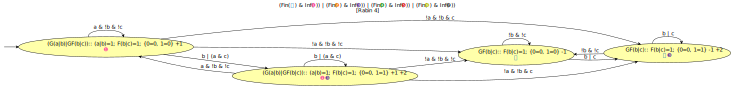

In [83]:
rab.aut_for_id(38,'R3')

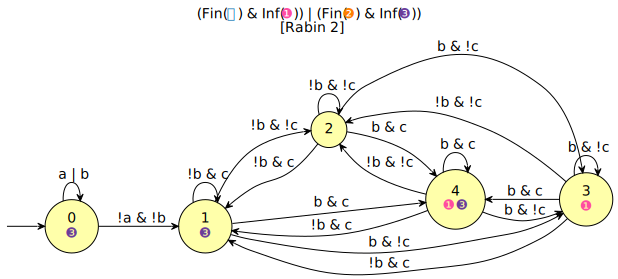

In [84]:
rab.aut_for_id(38,'R4')

# Generalized automata

## Tools' settings

In [85]:
### Tools' setting ###
end = " > %O"
tools = {"R3" : 'java -jar Rab3/rabinizer3.1.jar -silent -format=hoa -out=std %f > %O',
         "R4" : 'Rab4/bin/ltl2dgra %f > %O',
        }
### Order in which we want to sort the translations
rab_order = ["R1","R2","R3","R4"]
### File with measured statistics ###
rab_gen_csv = 'rabinizers_gen.csv'

In [86]:
rerun = True

In [87]:
rab_gen = LtlcrossRunner(tools,res_filename=rab_gen_csv,
                        formula_files=[fg_f],
                        cols=["states","transitions","acc","time"])
if rerun:
    rab_gen.run_ltlcross(timeout='60')
rab_gen.parse_results()

In [88]:
rab_gen.cummulative()

tool
R3    249
R4    175
dtype: int64

In [89]:
rab_gen.smaller_than('R3','R4')

,tool,R3,R4
form_id,formula,,


In [90]:
len(rab_gen.smaller_than('R4','R3'))

44